# Задание 8

Седых Иван БПМ181

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=120)
plt.style.use('ggplot')

palette = sns.color_palette()

---
## Task 1

In [3]:
from scipy.optimize import minimize

In [4]:
with np.load('data_89.npz') as data:
    X, y = data['A2'], data['y2']

n = X.shape[1]

In [5]:
def f(x, a):
    return 1 / (np.exp(a[0] + x@a[1:]) + 1)

def rse(a):
    y_pred = f(X, a)
    return np.sum((y_pred - y)**2)

In [6]:
res = minimize(rse, x0=np.zeros(n+1))
print(res)

      fun: 0.043552775722949945
 hess_inv: array([[ 87.84324896,  21.01171   , -32.45297551,  15.17048557, -60.89317842,   6.91687452, -33.85359202,
         51.75999596, -32.1687888 , -14.30037426,   4.51461481],
       [ 21.01171   ,   6.93062427,  -5.63514174,   3.43537725, -14.71550103,   1.90113682,  -6.36412281,
         12.4493102 ,  -7.07484505,  -2.22481104,   0.77355019],
       [-32.45297551,  -5.63514174,  17.93953261,  -7.49123126,  22.35636011,  -2.22770669,  15.48240338,
        -19.39507466,  12.93336907,   7.47418263,  -2.11829677],
       [ 15.17048557,   3.43537725,  -7.49123126,  10.08571154, -11.15873633,  -0.24884918,  -6.49569742,
          9.89067933,  -5.67047769,   1.11418025,  -1.0926864 ],
       [-60.89317842, -14.71550103,  22.35636011, -11.15873633,  44.46364087,  -4.47138478,  22.05023362,
        -36.51375589,  21.53514951,   8.49171079,  -3.01470562],
       [  6.91687452,   1.90113682,  -2.22770669,  -0.24884918,  -4.47138478,   2.21218281,  -3.021419

---
## Task 2

In [7]:
# ! pip install jax jaxlib

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [8]:
from jax import grad
import jax.numpy as jnp

In [9]:
def f(x, a):
    return 1 / (jnp.exp(a[0] + x@a[1:]) + 1)

def rse(a):
    y_pred = f(X, a)
    return jnp.sum((y_pred - y)**2)

grad_fn = grad(rse)

### JAX autograd

Использую jax потому что это стильно модно

min val: 0.045026376843452454


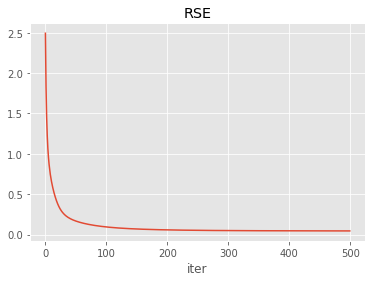

In [10]:
history = []

lr = 0.05
max_iter = 500
a = np.random.random(n+1)
for i in range(max_iter):
    grad_val = grad_fn(a)
    a -= lr * grad_val
    history.append(rse(a))

plt.plot(history);
plt.xlabel('iter');
plt.title('RSE')
print(f"min val: {np.min(history)}")

### Finite diffs

min val: 0.04504626989364624


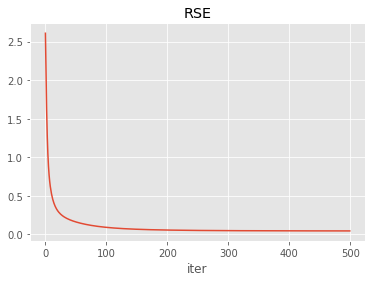

In [11]:
def grad_finite_diffs(f, x, step=1e-3):
    grad_val = np.zeros_like(x)
    for i in range(len(x)):
        h = np.zeros_like(x)
        h[i] = step
        left_val = f(x - h)
        right_val = f(x + h)
        grad_val[i] = (right_val - left_val) / (2 * step)
    return grad_val


history = []

lr = 0.05
max_iter = 500
a = np.random.random(n+1)

for i in range(max_iter):
    grad_val = grad_finite_diffs(rse, a)
    a -= lr * grad_val
    history.append(rse(a))

plt.plot(history);
plt.xlabel('iter');
plt.title('RSE')
print(f"min val: {np.min(history)}")

---
## Task 3

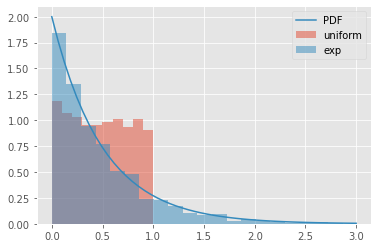

In [12]:
from scipy.stats import expon, ks_1samp

def inverse_func(x, lam):
    return -1/lam * np.log(1 - x)

n = 1000
lam = 2

U = np.random.random(n)
X = inverse_func(U, lam)

xx = np.linspace(0, 3)
true_pdf = expon.pdf(xx, scale=1/lam)

plt.hist(U, density=True, alpha=0.5, label='uniform');
plt.hist(X, density=True, bins=20, alpha=0.5, label='exp');
plt.plot(xx, true_pdf, label='PDF', c=palette[1])
plt.legend();

In [13]:
# Тест Колмогорова Симронова
# Видим, что pvalue большой (>0.05)
# значит с большой вероятностью семлы из одного распределения

stat_test = ks_1samp(X, expon.cdf, args={0, 1/lam})
stat_test

KstestResult(statistic=0.03883683690383399, pvalue=0.09538810494011385)

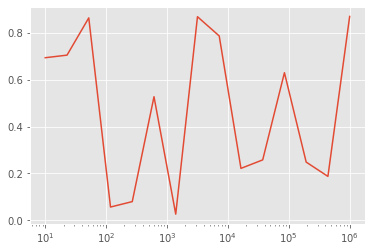

In [14]:
pvals = []
ns = np.logspace(1, 6, num=15)
for n in ns:
    n = int(n)
    lam = 2

    U = np.random.random(n)
    X = inverse_func(U, lam)
    pvals.append(
        ks_1samp(X, expon.cdf, args={0, 1/lam}).pvalue
    )
plt.plot(ns, pvals);
plt.xscale('log');

## Task 4

In [39]:
from scipy.stats import norm

n = 10_000

U, V = np.random.uniform(-1, 1, size=(2, n))
S = U**2 + V**2
mask = (0 < S) & (S < 1)
S = S[mask]
U, V = U[mask], V[mask]

Z0 = U * np.sqrt(-2*np.log(S) / S)
Z1 = V * np.sqrt(-2*np.log(S) / S)

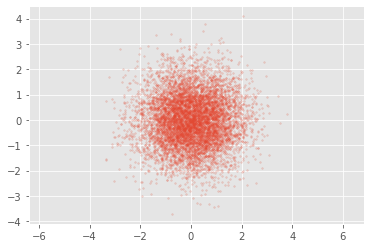

In [40]:
plt.scatter(Z0, Z1, s=3, alpha=0.2);
plt.axis('equal');

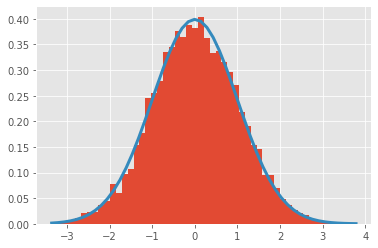

In [46]:
plt.hist(Z0, bins='auto', density=True);
xx = np.linspace(Z0.min(), Z0.max())
plt.plot(xx, norm.pdf(xx), lw=3);

In [42]:
# Тест Колмогорова Симронова
# Видим, что pvalue большой (>0.05)
# значит с большой вероятностью семлы из одного распределения

stat_test = ks_1samp(Z0, norm.cdf)
stat_test

KstestResult(statistic=0.014406176413468974, pvalue=0.07413312511049897)

---
## Task 5

$$
f(x) = \frac {e^{-x^T A x}} {1 + x_1^2 + \dots + x_8^2}
$$

In [49]:
with np.load('data_89.npz') as data:
    A = data['A4']
k = A.shape[0]

In [86]:
# я так и не смог дождаться завершения работы
TRYHARD_MODE = False

def f(x):
    return np.exp(-x @ (A @ x)) / (1 + np.sum(x**2))

if TRYHARD_MODE:
    from scipy import integrate

    def f_mod(x1,x2,x3,x4,x5,x6,x7,x8):
        x = np.array([x1,x2,x3,x4,x5,x6,x7,x8])
        return f(x)

    # bounds = [[-np.inf, np.inf]] * k
    bounds = [[-10, 10]] * k
    integrate.nquad(f_mod, ranges=bounds, opts={'epsabs' : 1e-02})

In [145]:
# заметим, что матрицы А -- симметричная положительно определенная, что наталкивает на мысль, что нужно 
# использовать многомерное нормальное распределение

np.all(A == A.T), np.all(np.linalg.eigvals(A) > 0)

(True, True)

In [192]:
from scipy.stats import multivariate_normal

def g(x):
    return np.exp(-0.5 * x @ (A @ x)) / (1 + np.sum(x**2)) 

n = 10_000
w = multivariate_normal(cov=np.linalg.inv(A))

results = []
n_iters = 500

norm_coef = np.sqrt((2*np.pi)**k * np.linalg.det(np.linalg.inv(A)))
for _ in range(n_iters):
    xs = w.rvs(n)

    res = np.mean([g(x) for x in xs])
    res *= norm_coef
    results.append(res)

0.42370551568346043


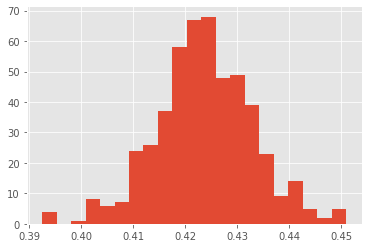

In [193]:
answer = np.mean(results)

print(answer)
plt.hist(results, bins='auto');